Genetic Algorithm - An algorithm that pits different solutions against each other and uses selection to "evolve" them into the best solution.

Genetic algorithms efficiently explore the solution space to discover optimal or near-optimal solutions.

By mimicking the process of natural selection, GAs can evolve solutions over time, improving their performance iteratively. 

Genetic Algorithms were inspired by evolution. Consequently, the components of a GA share names and functions similar to those of their biological counterparts. 

---

**Key Terminology**

**Chromosomes** - potential solutions to a problem, typically coded as strings or arrays. Each element in a chromosome corresponds to a gene that determines a specific trait of the solution. 

**Crossover** - involves exchanging segments of the *'parent'* chromosomes to create new *'individuals'*. This operation introduces variability and allows the *'offspring'* to inherit beneficial traits from both *'parents'*.

**Mutation** - randomly altering one or more genes. 

---

**Components of a Genetic Algorithm**

**Population** - a set of candidate solutions, often called individuals. Each individual is represented as a chromosome, which can be coded as binary strings, arrays, or other data structures. 

**Fitness Function** - evaluates each individual's ability to solve the problem we're interested in. It assigns a fitness value to each individual, with higher values for better solutions. The fitness function guides the algorithm toward better solutions. 

**Selection Function** - chooses individuals from the population to reproduce based on their fitness. Individuals with a higher fitness are more likely to be chosen for reproduction. There are a few different selection methods:
- **Roulette Wheel Selection** is where individuals are selected based on a probability proportional to their fitness, similar to spinning a roulette wheel. 
- **Tournament Selection** is where a subset of individuals is chosen at random and the fittest individual from this subset is selected.
- **Rank-based Selection** ranks individuals based on their fitness, then selection probabilities are assigned based on these ranks rather than raw fitness values. 

**Crossover Function** - combines information from two individuals to create offspring; the goal is to inherit beneficial traits from both parents. Common crossover techniques include:
- **Single-point Crossover** which involves choosing a random point and swapping the genetic material from two parents at that point to create two offspring. 
- **Multi-point Crossover** uses multiple points for swapping segments between parents, allowing for more complex genetic combinations.
- **Uniform Crossover** randomly decides which parent will contribute each gene, providing a high level of genetic diversity.
- **Blend Crossover** generates offspring by blending the genes of the parents using a random blending factor.

**Mutation Function** - mutations introduce random changes in the offspring's genetic material. This helps maintain diversity in the population and explores new areas of the solution space. 

---

**The Genetic Algorithm Process**

A genetic algorithm goes through a series of steps that mimic natural evolutionary processes to find optimal solutions. These steps allow the population to evolve over generations, improving the quality of solutions. This is generally how a genetic algorithm proceeds:

**Step 1: Initialization**
First generate an initial population of random individuals. This step creates a diverse set of potential solutions to start the algorithm. 

**Step 2: Evaluation**
Next calculate the fitness of each individual in the population. Here we use the fitness function to evaluate how good each solution is.

**Step 3: Selection**
Using the selection criteria, we select individuals for reproduction based on their fitness. This step determines which individuals will be parents.

**Step 4: Crossover**
Crossover is done by combining the genetic material of selected parents, we apply crossover techniques to generate new solutions or offspring.

**Step 5: Mutation**
To maintain diversity in our population, we need to introduce random mutations in the offspring.

**Step 6: Replacement**
We replace some or all of the old population with the new offspring, by determining which individuals move on to the next generation.

**Step 7: Repeat**
The previous steps 2-6 are looped over for a set number of generations or until a termination condition is met. This loop allows the population to evolve over time, hopefully resulting in a good solution.

---

Imports

In [4]:
import random   # Generate random values for starting population
import matplotlib.pyplot as plt
import numpy as np

Define Fitness Function

In [5]:
def fitness_function(params):
    a, b, c = params
    if a < 0:
        return -float('inf')    # Penalize downward facing u-shapes heavily
    vertex_x = -b / (2 * a)     # x value at vertex
    vertex_y = a * (vertex_x ** 2) + b * vertex_x + c  # y value at vertex
    y_left = a * (-1) ** 2 + b * (-1) + c   # y-coordinate at x = -1
    y_right = a * (1) ** 2 + b * (1) + c    # y-coordinate at x = 1
    curviness = abs(y_left - vertex_y) + abs(y_right = vertex_y)
    return -curviness   # Negate to minimize curviness

Create initial population

In [6]:
def create_initial_population(size, lower_bound, upper_bound):
    population = []
    for _ in range(size):
        individual = (random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound))
        population.append(individual)
    return population

Create a selection function

In [7]:
def selection(population, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

Make a Crossover function

In [8]:
def crossover(parent1, parent2):
    alpha = random.random()
    child1 = tuple(alpha * p1 + (1-alpha) * p2 for p1, p2 in zip(parent1, parent2))
    child2 = tuple(alpha * p1 + (1-alpha) * p2 for p1, p2 in zip(parent1, parent2))
    return child1, child2

Design a mutation function

In [9]:
def mutation(individual, mutation_rate, lower_bound, upper_bound):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutation_amount = random.uniform(-1, 1)
            individual[i] += mutation_amount
            # Ensure the individual stays within upper bounds
            individual[i] = max(min(individual[i], upper_bound), lower_bound)
    return tuple(individual)

Main Loop

In [10]:
def genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate):
    population = create_initial_population(population_size, lower_bound, upper_bound)

    # Prepare for plotting
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    best_performers = []
    all_populations = []

    print("\n{:<10} {:<10} {:<10} {:<10} {:<15}".format("Generation", "a", "b", "c", "Fitness"))
    print("=" * 60)
    
    for generation in range(generations):
        fitnesses = [fitness_function(ind) for ind in population]

        # Store the best performer of the current generation
        best_individual = max(population, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        best_performers.append((best_individual, best_fitness))
        all_populations.append(population[:])

        # Print generation results in table format
        print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<15.4f}".format(
            generation + 1, best_individual[0], best_individual[1], best_individual[2], best_fitness))

        # Selection and reproduction
        population = selection(population, fitnesses)
        next_population = []

        for i in range(0, len(population, 2)):
            parent1 = population[i]
            parent2 = population[i + 1]
            child1, child2 = crossover(parent1, parent2)
            next_population.append(mutation(child1, mutation_rate, lower_bound, upper_bound))
            next_population.append(mutation(child2, mutation_rate, lower_bound, upper_bound))

            # Replace the old population with the new one, preserving the best individual
            next_population[0] = best_individual
            population = next_population

        # Print the table
        print("=" * 60)

        # Plot the population of one generation (last generation)
        final_population = all_populations[-1]
        final_fitnesses = [fitness_function(ind) for ind in final_population]

        axs[0].scatter(range(len(final_population)), [ind[0] for ind in final_population], color='blue', label='a')
        axs[0].scatter([final_population.index(best_individual)], [best_individual[0]], color='cyan', s=100, label='Best Individual a')
        axs[0].set_ylabel('a', color='blue')
        axs[0].legend(loc='upper left')
    
        axs[1].scatter(range(len(final_population)), [ind[1] for ind in final_population], color='green', label='b')
        axs[1].scatter([final_population.index(best_individual)], [best_individual[1]], color='magenta', s=100, label='Best Individual b')
        axs[1].set_ylabel('b', color='green')
        axs[1].legend(loc='upper left')
    
        axs[2].scatter(range(len(final_population)), [ind[2] for ind in final_population], color='red', label='c')
        axs[2].scatter([final_population.index(best_individual)], [best_individual[2]], color='yellow', s=100, label='Best Individual c')
        axs[2].set_ylabel('c', color='red')
        axs[2].set_xlabel('Individual Index')
        axs[2].legend(loc='upper left')
    
        axs[0].set_title(f'Final Generation ({generations}) Population Solutions')

        # Plot the values of a, b, and c over generations
        generations_list = range(1, len(best_performers) + 1)
        a_values = [ind[0][0] for ind in best_performers]
        b_values = [ind[0][1] for ind in best_performers]
        c_values = [ind[0][2] for ind in best_performers]
        fig, ax = plt.subplots()
        ax.plot(generations_list, a_values, label='a', color='blue')
        ax.plot(generations_list, b_values, label='b', color='green')
        ax.plot(generations_list, c_values, label='c', color='red')
        ax.set_xlabel('Generation')
        ax.set_ylabel('Parameter Values')
        ax.set_title('Parameter Values Over Generations')
        ax.legend()

        # Plot the fitness values over generations
        best_fitness_values = [fit[1] for fit in best_performers]
        min_fitness_values = [min([fitness_function(ind) for ind in population]) for population in all_populations]
        max_fitness_values = [max([fitness_function(ind) for ind in population]) for population in all_populations]
        fig, ax = plt.subplots()
        ax.plot(generations_list, best_fitness_values, label='Best Fitness', color='black')
        ax.fill_between(generations_list, min_fitness_values, max_fitness_values, color='gray', alpha=0.5, label='Fitness Range')
        ax.set_xlabel('Generation')
        ax.set_ylabel('Fitness')
        ax.set_title('Fitness Over Generations')
        ax.legend()

        # Plot the quadratic function for each generation
        fig, ax = plt.subplots()
        colors = plt.cm.viridis(np.linspace(0, 1, generations))
        for i, (best_ind, best_fit) in enumerate(best_performers):
            color = colors[i]
            a, b, c = best_ind
            x_range = np.linspace(lower_bound, upper_bound, 400)
            y_values = a * (x_range ** 2) + b * x_range + c
            ax.plot(x_range, y_values, color=color)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Quadratic Function')

        # Create a subplot for the colorbar
        cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
        norm = plt.cm.colors.Normalize(vmin=0, vmax=generations)
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', label='Generation')

        plt.show()

        return max(population, key=fitness_function)


Making it all run


Generation a          b          c          Fitness        


TypeError: abs() takes no keyword arguments

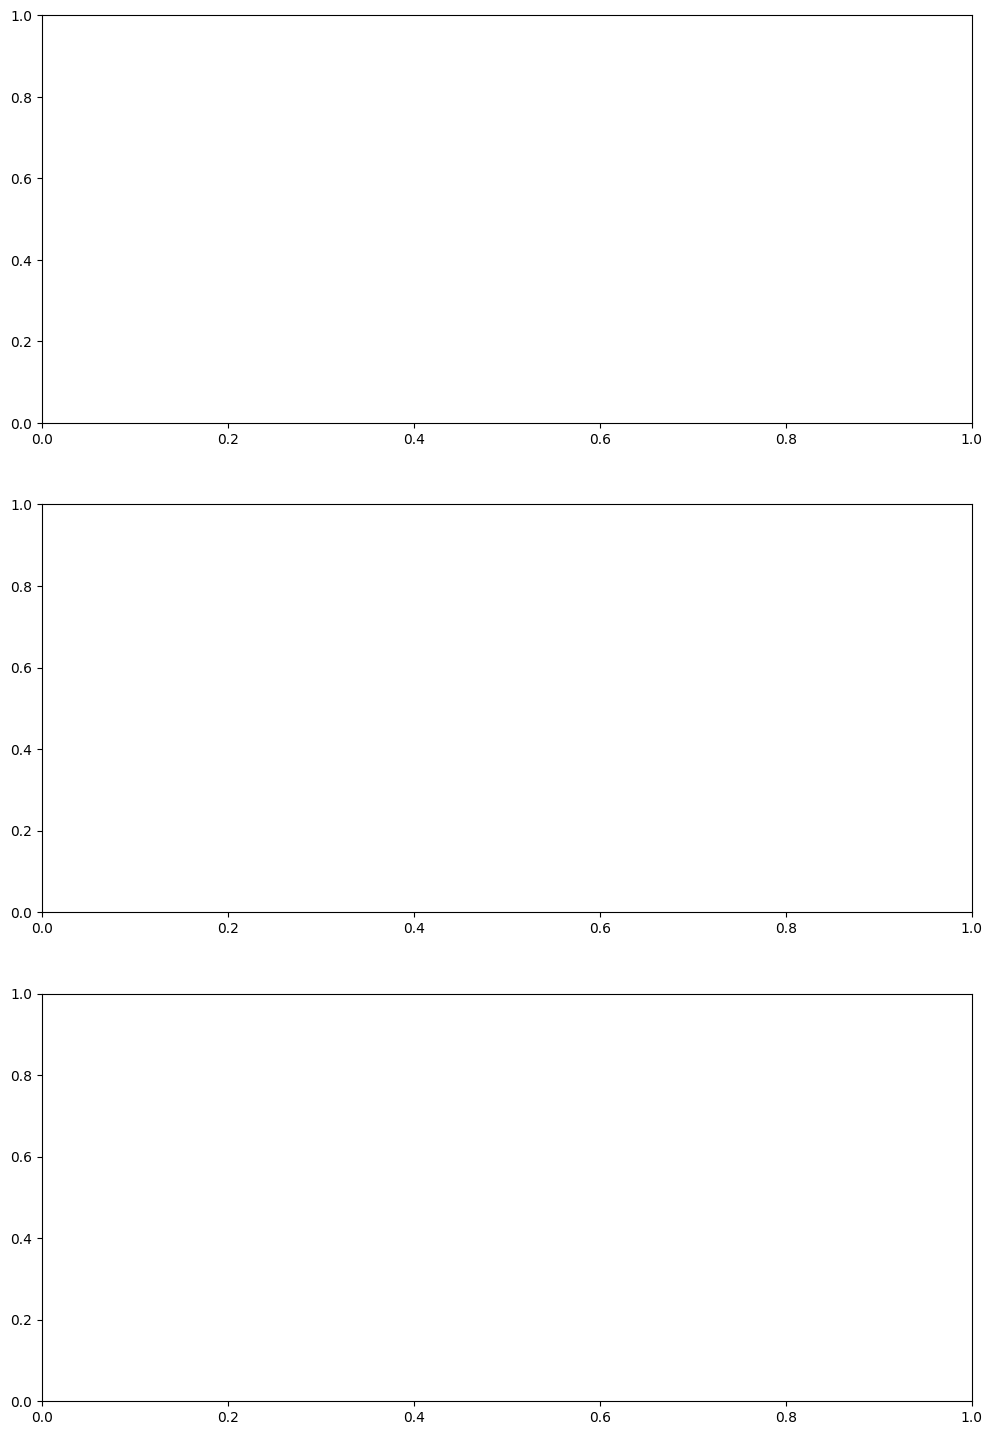

In [11]:
# Parameters for the genetic algorithm
population_size = 100
lower_bound = -50
upper_bound = 50
generations = 20
mutation_rate = 1

# Run the GA
best_solution = genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate)
print(f"Best solution found: a = {best_solution[0]}, b = {best_solution[1]}, c = {best_solution[2]}")